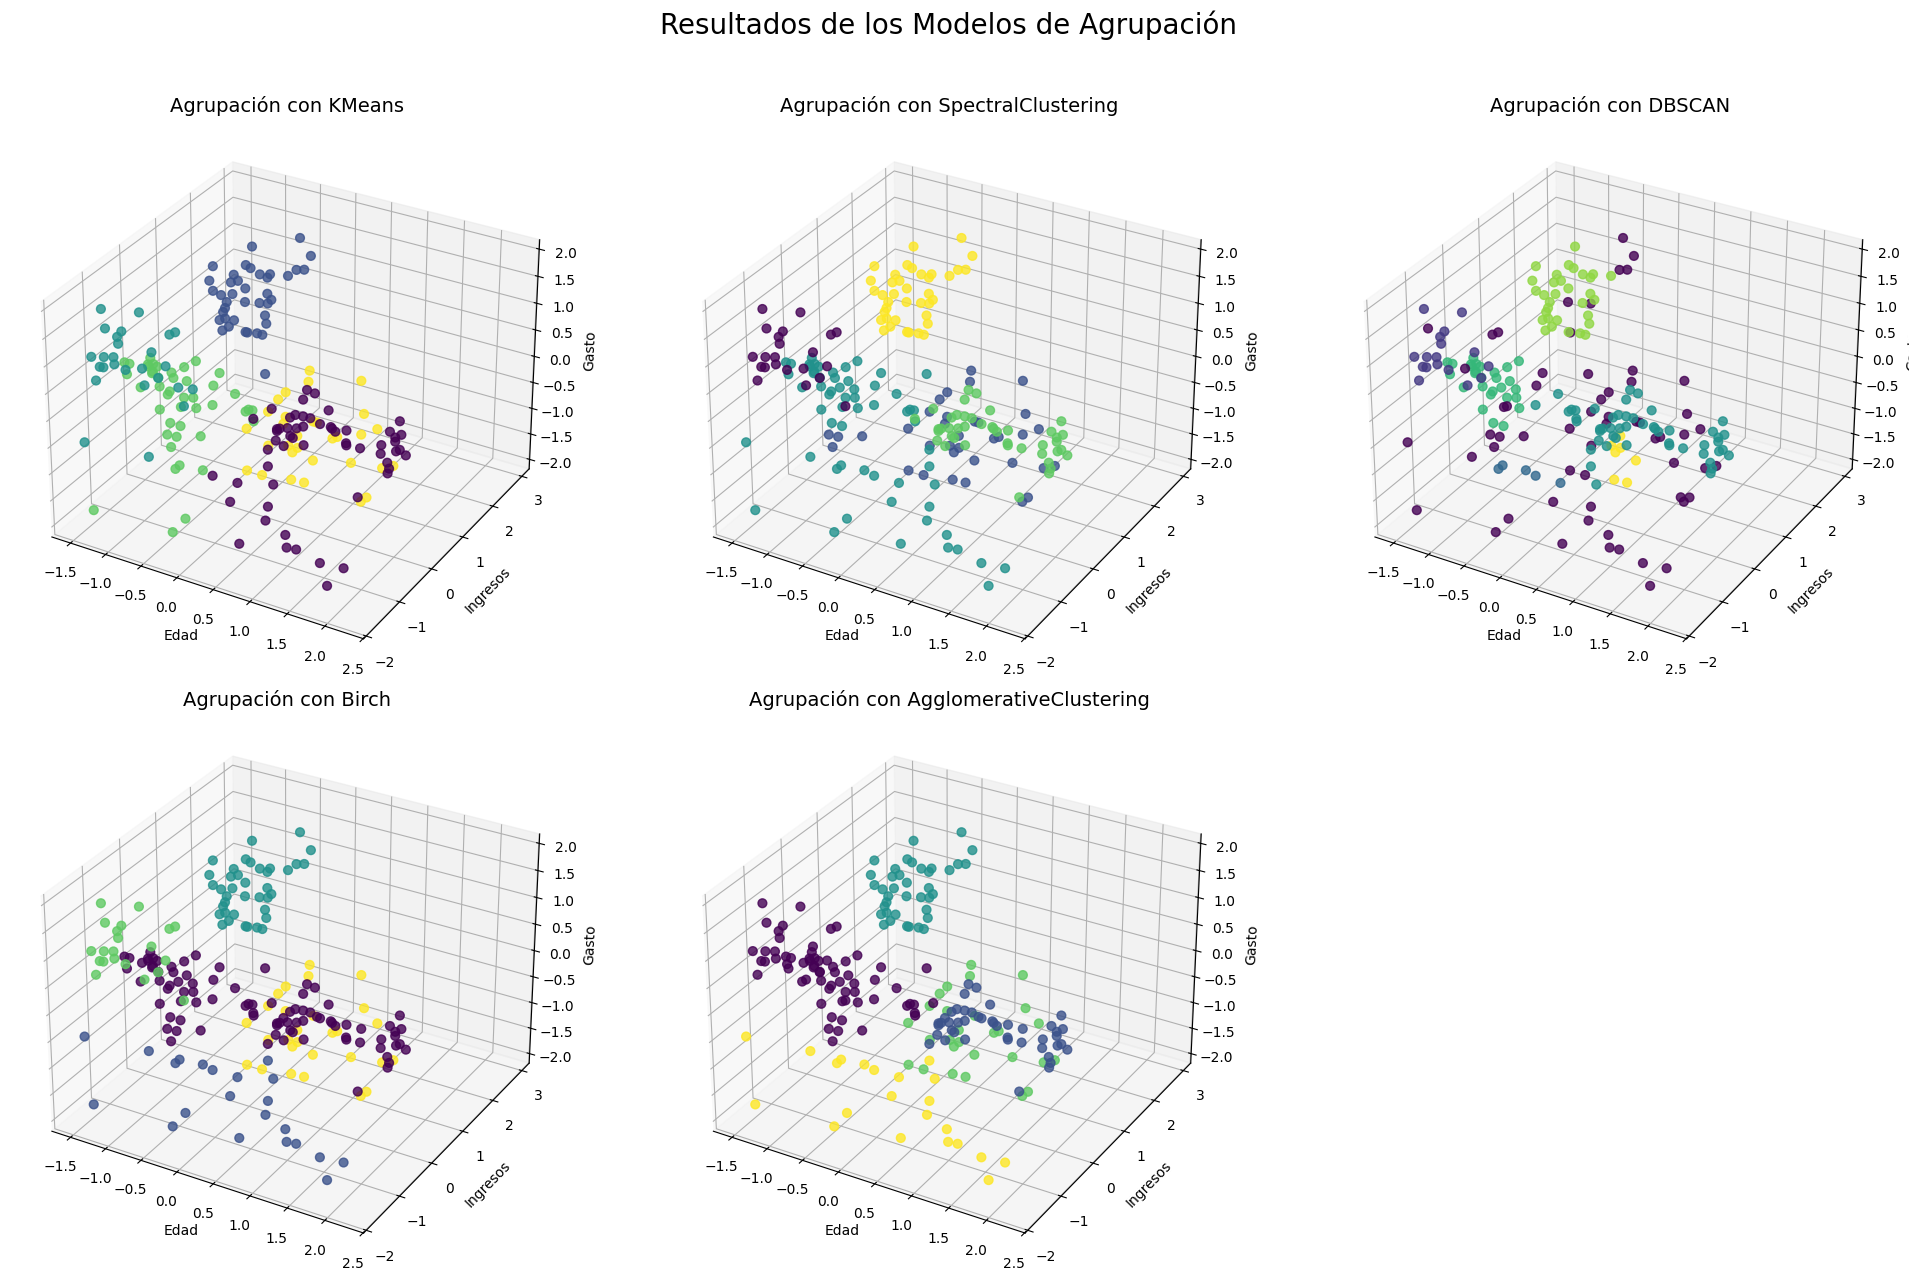

In [ ]:

# --- 4. Aplicación de Modelos de Agrupación ---
# Definimos los modelos que vamos a utilizar.
# Para este dataset, 5 clústeres es una suposición común y efectiva.
n_clusters = 5

clustering_models = {
    'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init='auto'),
    'SpectralClustering': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Birch': Birch(n_clusters=n_clusters),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=n_clusters)
}

# --- 5. Visualización de los Resultados ---
# Creamos una figura grande para contener todos los subgráficos.
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Resultados de los Modelos de Agrupación', fontsize=20)

# Iteramos sobre cada modelo para entrenarlo y visualizar su resultado.
for i, (name, model) in enumerate(clustering_models.items()):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')

    # Entrenamos el modelo y obtenemos las etiquetas de los clústeres.
    clusters = model.fit_predict(X_scaled)

    # Gráfico de dispersión 3D coloreado por clúster.
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='viridis', s=40, alpha=0.8)

    # Títulos y etiquetas para cada subgráfico.
    ax.set_title(f'Agrupación con {name}', fontsize=14)
    ax.set_xlabel('Edad')
    ax.set_ylabel('Ingresos')
    ax.set_zlabel('Gasto')

# Ajustamos el diseño para que no se superpongan los títulos.
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('mall_customers_clustered_final.png')
plt.show()


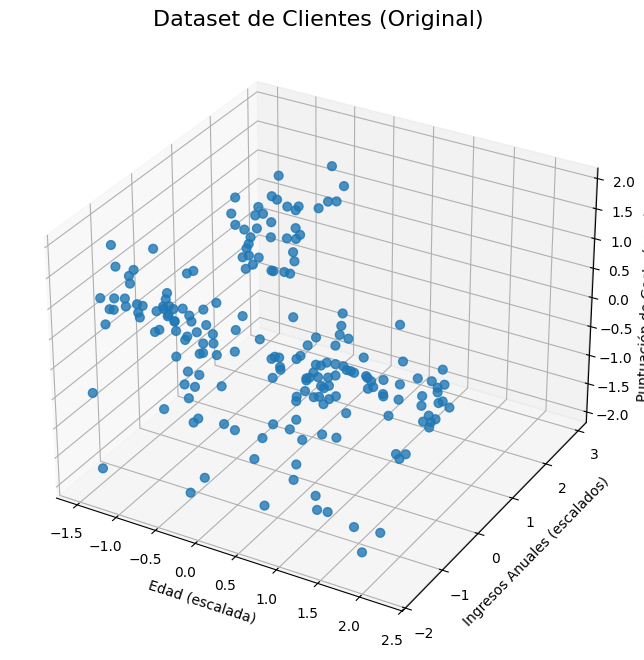

--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---
Métricas para KMeans calculadas.
Métricas para SpectralClustering calculadas.
Métricas para DBSCAN calculadas.
Métricas para Birch calculadas.
Métricas para AgglomerativeClustering calculadas.




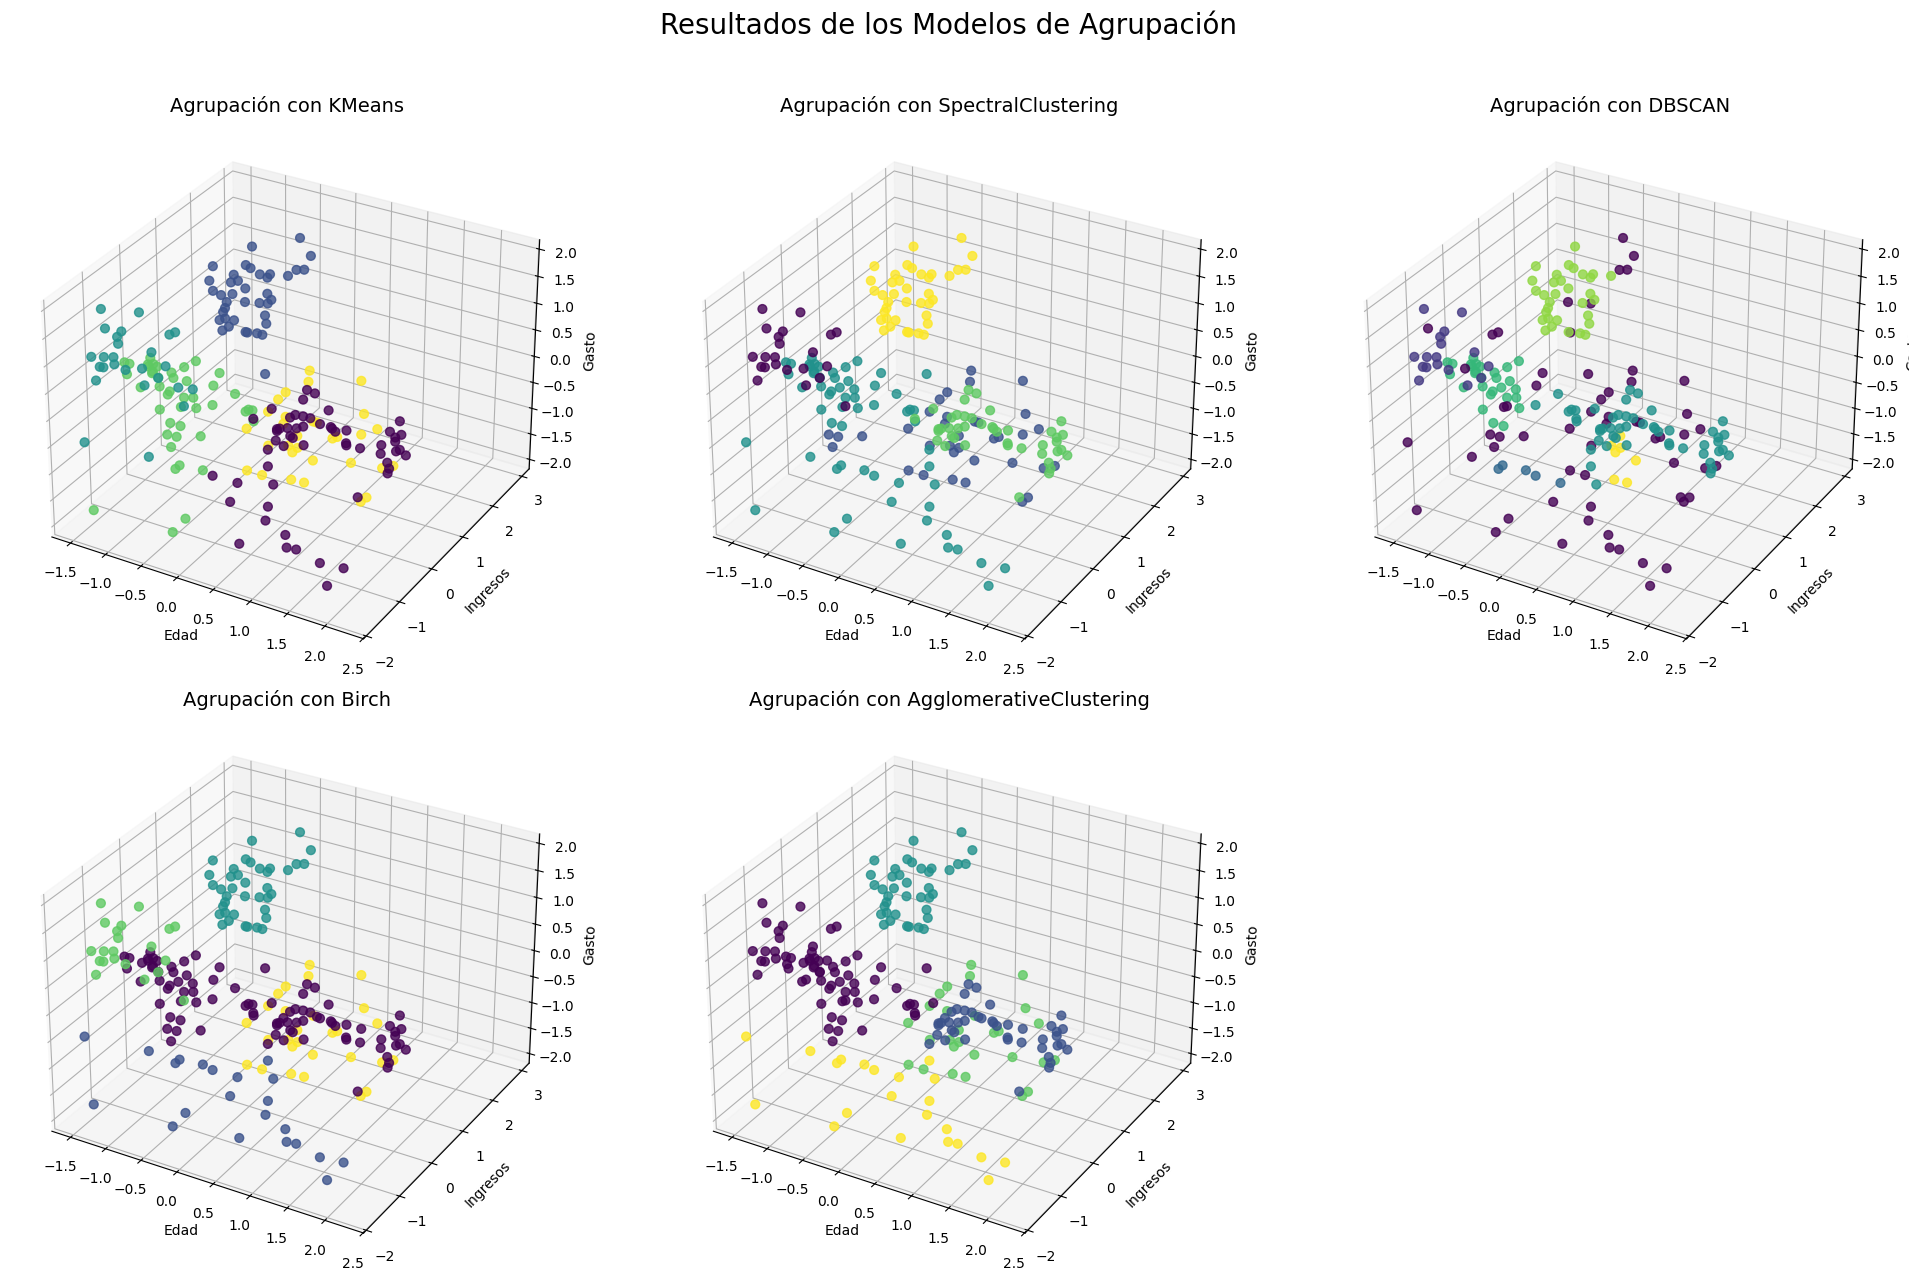


--- RESUMEN DE MÉTRICAS INTERNAS DE CLUSTERING ---

## KMeans:
  - Coeficiente de Silueta      : 0.4085 (más alto es mejor)
  - Índice Davies-Bouldin       : 0.8890 (más bajo es mejor)
  - Índice Calinski-Harabasz    : 123.4187 (más alto es mejor)
----------------------------------------
## SpectralClustering:
  - Coeficiente de Silueta      : 0.3734 (más alto es mejor)
  - Índice Davies-Bouldin       : 1.0148 (más bajo es mejor)
  - Índice Calinski-Harabasz    : 101.6693 (más alto es mejor)
----------------------------------------
## DBSCAN:
  - Coeficiente de Silueta      : 0.1845 (más alto es mejor)
  - Índice Davies-Bouldin       : 1.7569 (más bajo es mejor)
  - Índice Calinski-Harabasz    : 34.0705 (más alto es mejor)
  - Clústeres Encontrados       : 6.0000 
  - Puntos de Ruido             : 60.0000 
----------------------------------------
## Birch:
  - Coeficiente de Silueta      : 0.3231 (más alto es mejor)
  - Índice Davies-Bouldin       : 1.1507 (más bajo es mejor)
  - Índi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    AgglomerativeClustering,
    Birch,
    DBSCAN,
    KMeans,
    SpectralClustering,
)

# --- Importación de métricas ---
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

# --- 1. Carga de Datos ---
url = 'https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv'
df = pd.read_csv(url)

# --- 2. Selección de Características y Escalado ---
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Visualización del Dataset Original (sin cambios) ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], s=40, alpha=0.8)
ax.set_title('Dataset de Clientes (Original)', fontsize=16)
ax.set_xlabel('Edad (escalada)')
ax.set_ylabel('Ingresos Anuales (escalados)')
ax.set_zlabel('Puntuación de Gasto (escalada)')
plt.show()

# --- 4. Aplicación de Modelos y Cálculo de Métricas ---
n_clusters = 5
clustering_models = {
    'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init='auto'),
    'SpectralClustering': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Birch': Birch(n_clusters=n_clusters),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=n_clusters)
}

# Diccionarios para almacenar los resultados
all_clusters = {}
all_metrics = {}

print("--- ENTRENANDO MODELOS Y CALCULANDO MÉTRICAS ---")
for name, model in clustering_models.items():
    # Entrenar y predecir
    clusters = model.fit_predict(X_scaled)
    all_clusters[name] = clusters

    # Calcular métricas internas (no se usan etiquetas verdaderas)
    metrics = {}
    unique_labels = len(set(clusters))
    if unique_labels > 1:
        metrics['Coeficiente de Silueta'] = silhouette_score(X_scaled, clusters)
        metrics['Índice Davies-Bouldin'] = davies_bouldin_score(X_scaled, clusters)
        metrics['Índice Calinski-Harabasz'] = calinski_harabasz_score(X_scaled, clusters)
    else:
        metrics['Coeficiente de Silueta'] = 'N/A'
        metrics['Índice Davies-Bouldin'] = 'N/A'
        metrics['Índice Calinski-Harabasz'] = 'N/A'

    # Información especial para DBSCAN
    if name == 'DBSCAN':
        n_clusters_found = len(set(c for c in clusters if c != -1))
        n_noise = list(clusters).count(-1)
        metrics['Clústeres Encontrados'] = n_clusters_found
        metrics['Puntos de Ruido'] = n_noise

    all_metrics[name] = metrics
    print(f"Métricas para {name} calculadas.")
print("\n" + "="*50 + "\n")

# --- 5. Visualización de los Resultados ---
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Resultados de los Modelos de Agrupación', fontsize=20)

for i, (name, clusters) in enumerate(all_clusters.items()):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=clusters, cmap='viridis', s=40, alpha=0.8)
    ax.set_title(f'Agrupación con {name}', fontsize=14)
    ax.set_xlabel('Edad')
    ax.set_ylabel('Ingresos')
    ax.set_zlabel('Gasto')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 6. Mostrar el Resumen de Métricas ---
print("\n" + "="*50)
print("--- RESUMEN DE MÉTRICAS INTERNAS DE CLUSTERING ---")
print("="*50 + "\n")

for name, metrics in all_metrics.items():
    print(f"## {name}:")
    for metric_name, value in metrics.items():
        # Añadimos una pequeña guía para interpretar el valor
        guide = ""
        if "Silueta" in metric_name or "Calinski" in metric_name:
            guide = "(más alto es mejor)"
        elif "Davies-Bouldin" in metric_name:
            guide = "(más bajo es mejor)"

        if isinstance(value, (int, float)):
            print(f"  - {metric_name:<28}: {value:.4f} {guide}")
        else:
            print(f"  - {metric_name:<28}: {value}")
    print("-" * 40)